Problem Statement - Qualitative Bankruptcy - Problem_Description.pdf

Please follow the below steps to complete the project ( 60 points)
1. Read the dataset and understand the features and target variable. 4 points
2. Encode independent features. 4 points
3. Separate the dependant variable from the rest of the train data 2 point
4. Split the dataset into training and test data ( Take 80:20 ratio). 2 points
5. Apply PCA on the independent features of train data. 2 point
6. Display elbow plot to find out reduced number of dimensions (which covers more than
95% of the variance). 6 points
7. Transform the data using PCA ( select optimum number of PCs). 4 points
8. Apply KMeans algorithm on the above transformed data. 6 points
9. Select optimal number of clusters and form clusters out of the train data. 10 points
10. Create a new column in the train data and populate it with the cluster labels. 4 points
11. Transform the test data using the same PCA object that was fit on the train data. 4
points
12. Use the same kmeans object, assign cluster labels to the test data and store it as a
feature. 4 points
13. Apply SVC model on train dataset and predict target for test dataset. 6 points
14. Check accuracy and confusion matrix. 2 point


About the dataset:

1. Title: Qualitative_Bankruptcy database

2. Source Information
   	-- Creator:  Martin.A, Uthayakumar.j and Nadarajan.m (uthayakumar17691@gmail.com)
  	-- Guided By: Dr.V.Prasanna Venkatesan
   	-- Date:      February 2014

3. Past Usage:
	The attributes or parameters which we used for collecting the dataset is referred from the paper"The discovery of expertsí 
	decision rules from qualitative bankruptcy data using genetic algorithms" by Myoung-Jong Kim*, Ingoo Han.
 
4. Number of Instances: 250 
 
5. Number of Attributes: 6, each corresponding to Qualitative Parameters in Bankruptcy
 
6. Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

Internal Risks: 	
i.Industry risk (IR) : 
	Government policies and International agreements, 
	Cyclicality, 
	Degree of competition,				
	The price and stability of market supply,
	The size and growth of market demand,	
	The sensitivity to changes in macroeconomic factors,
	Domestic and international competitive power, 
	Product Life Cycle.
ii.Management risk(MR): 
	Ability and competence of management, 
	Stability of management,
	The relationship between management/ owner, 
	Human resources management, 
	Growth process/business performance, 
	Short and long term business planning, 
	achievement and feasibility. 
iii.Financial Flexibility(FF): 
	Direct financing, 
	Indirect financing, 
	Other financing 
iv.Credibility (CR):  
	Credit history,  
	reliability of information, 
	The relationship with financial institutes.
v.Competitiveness (CO):  
	Market position, 
	The level of core capacities, 
	Differentiated strategy, 
vi.Operating Risk (OP):  
	The stability and diversity of procurement, 
	The stability of transaction, 
	The efficiency of production, 
	The prospects for demand for product and service, 
	Sales diversification,
	Sales price and settlement condition, 
	Collection of A/R,
	Effectiveness of sale network.
 
7. Missing Attribute Values: None
 
8. Class Distribution: [143 instances For Non-Bankruptcy] [107 instances For Bankruptcy]
        Information about the dataset
  	CLASSTYPE: nominal


In [0]:
import pandas as pd
import scipy as scp
import numpy as np
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score
import sklearn.preprocessing as preproc

## for train & test split
from sklearn.model_selection import train_test_split  

## calculation of MSE & RMSE
from sklearn import metrics  

# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from scipy.stats import zscore

# Calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [0]:
qb_df_raw = pd.read_csv("https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/UnsupervisedLearning/Qualitative_Bankruptcy.data.txt?token=ABRYHI6VSVBNHGIVGPAPFOS6JYLOQ", names =["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])


In [53]:
qb_df_raw.shape

(250, 7)

In [54]:
qb_df_raw.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [55]:
qb_df_raw.describe().transpose()

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [56]:
qb_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null object
Management Risk          250 non-null object
Financial Flexibility    250 non-null object
Credibility              250 non-null object
Competitiveness          250 non-null object
Operating Risk           250 non-null object
Class                    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [57]:
qb_df_in = qb_df_raw.drop("Class", axis=1)
qb_df_in.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [58]:
column = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk']
def func_labelEncoder(column,features):
    encode= LabelEncoder()
    features[column] = encode.fit_transform(features[column].astype(str)) 
   
for i in column:
    func_labelEncoder(i,qb_df_in)

qb_df_in.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


In [59]:
qb_df_in.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Industrial Risk,250.0,0.996,0.804096,0.0,0.0,1.0,2.0,2.0
Management Risk,250.0,0.972,0.724788,0.0,0.0,1.0,1.0,2.0
Financial Flexibility,250.0,0.932,0.722123,0.0,0.0,1.0,1.0,2.0
Credibility,250.0,1.008,0.791481,0.0,0.0,1.0,2.0,2.0
Competitiveness,250.0,1.140,0.755435,0.0,1.0,1.0,2.0,2.0
Operating Risk,250.0,1.088,0.733764,0.0,1.0,1.0,2.0,2.0


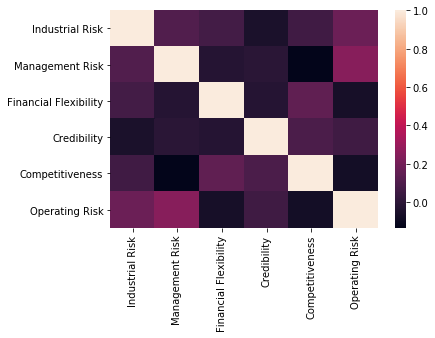

In [60]:
sns.heatmap(qb_df_in.corr())

Since the correlation amonngst the dependent variables are between -0.5 and 0.5, all the variables are being important and considered for further analysis.

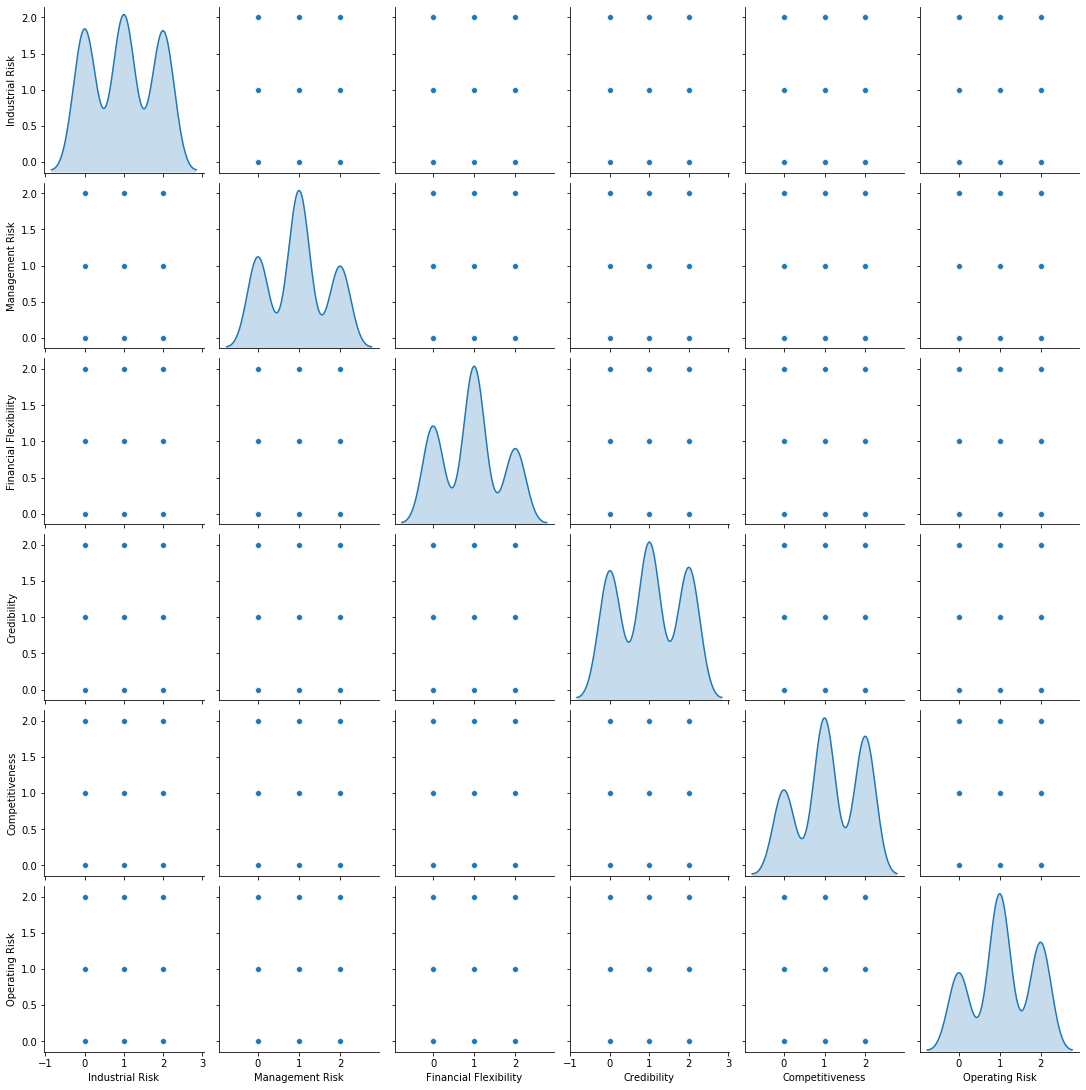

In [61]:
sns.pairplot(qb_df_in,diag_kind='kde')

In [0]:
ohe = OneHotEncoder()
x_val = ohe.fit_transform(qb_df_in).toarray()
y_val = qb_df_raw["Class"]

In [63]:
x_val.shape

(250, 18)

In [64]:
y_val.shape

(250,)

In [65]:
x_val

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=20)
print('X_train.shape : ',X_train.shape)
print('Y_train.shape : ',Y_train.shape)
print('X_test.shape : ',X_test.shape)
print('Y_test.shape : ',Y_test.shape)



X_train.shape :  (200, 18)
Y_train.shape :  (200,)
X_test.shape :  (50, 18)
Y_test.shape :  (50,)


In [67]:
pca = PCA(n_components =  None)
pca.fit(X_train)
var_explained = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_explained)
print("Variance Values \n" , var_explained)
print("Cummulative Variance Values \n" , cum_var_exp)

Variance Values 
 [2.72033913e-01 1.22774194e-01 9.92689428e-02 9.50708929e-02
 7.99169074e-02 7.50773154e-02 6.90029634e-02 5.59487061e-02
 4.92247318e-02 4.25979525e-02 2.67901312e-02 1.22933500e-02
 2.01388319e-32 1.18842272e-32 6.11269344e-33 4.77296629e-33
 2.40715247e-33 8.58813633e-34]
Cummulative Variance Values 
 [0.27203391 0.39480811 0.49407705 0.58914794 0.66906485 0.74414217
 0.81314513 0.86909383 0.91831857 0.96091652 0.98770665 1.
 1.         1.         1.         1.         1.         1.        ]


In [68]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 2.20477387e-01 -1.17587940e-01 -1.02889447e-01  6.25628141e-02
  -6.63316583e-02  3.76884422e-03  1.08040201e-02  5.77889447e-03
  -1.65829146e-02  7.53768844e-03 -2.18592965e-02  1.43216080e-02
   1.03015075e-02 -2.16080402e-02  1.13065327e-02  4.04522613e-02
  -4.48492462e-02  4.39698492e-03]
 [-1.17587940e-01  2.31557789e-01 -1.13969849e-01 -6.75376884e-02
   9.26633166e-02 -2.51256281e-02 -1.44723618e-02  3.37688442e-02
  -1.92964824e-02 -8.04020101e-03  1.96984925e-02 -1.16582915e-02
  -2.79396985e-02  6.91457286e-02 -4.12060302e-02 -7.83919598e-03
   4.50251256e-02 -3.71859296e-02]
 [-1.02889447e-01 -1.13969849e-01  2.16859296e-01  4.97487437e-03
  -2.63316583e-02  2.13567839e-02  3.66834171e-03 -3.95477387e-02
   3.58793970e-02  5.02512563e-04  2.16080402e-03 -2.66331658e-03
   1.76381910e-02 -4.75376884e-02  2.98994975e-02 -3.26130653e-02
  -1.75879397e-04  3.27889447e-02]
 [ 6.25628141e-02 -6.75376884e-02  4.97487437e-03  1.98090452e-01
  -1.30251256e-

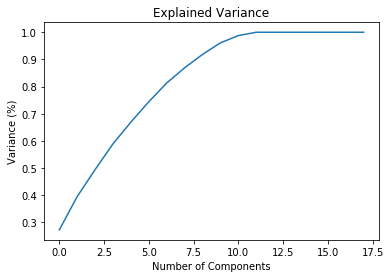

In [69]:
plt.figure()
plt.plot(cum_var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [70]:
pca = PCA(n_components=10)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [72]:
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.07724127 -0.47970379 -0.09879866  0.24864687 -0.0312106  -0.11574271
   0.15099286 -0.20216241 -0.13496484 -0.04279002 -0.45381031  0.23445475
   0.03112199  0.04498445  0.25267523 -0.03097992 -0.42332301  0.09119319]
 [ 0.17666579  0.42372591 -0.12945927  0.30395589  0.12564307 -0.04795888
  -0.1095805  -0.08173867 -0.23965477 -0.14613574  0.41061647 -0.25018405
   0.03112199  0.04498445  0.25267523 -0.03097992 -0.42332301  0.09119319]
 [-0.09942452  0.05597789  0.22825793 -0.55260275 -0.09443246  0.16370159
  -0.04141237  0.28390108  0.37461961  0.18892576  0.04319384  0.01572931
   0.03112199  0.04498445  0.25267523 -0.03097992 -0.42332301  0.09119319]
 [-0.07323818 -0.42851522  0.25162904  0.09359686 -0.01478517  0.14464831
   0.06592279 -0.04053038  0.18660762 -0.41846363  0.3123993  -0.26634978
   0.00785039  0.11333464  0.4936974   0.23838496  0.24241026  0.07440408]
 [ 0.24730818  0.37901909 -0.15742465  0.21088686 -0.01292455 -0.01742601
  -0.09423104  0

In [0]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [74]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 27.20339126  39.48081066  49.40770494  58.91479423  66.90648497
  74.41421651  81.31451284  86.90938345  91.83185663  96.09165188
  98.770665   100.         100.         100.         100.
 100.         100.         100.        ]


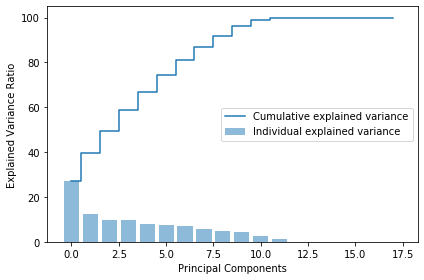

In [75]:
plt.figure(figsize=(6,4))
plt.bar(range(18), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(18), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

It can be observed that the first 10 components explain more than 95% of the variance

In [76]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-
X_std = StandardScaler().fit_transform(X_train)
cluster_range = range( 1, 10)   
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_std)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:100]

,num_clusters,cluster_errors
0,1,3600.000000
1,2,2767.420723
2,3,2474.598850
3,4,2271.498429
4,5,2104.217684
5,6,1962.804839
6,7,1858.801334
7,8,1787.232663
8,9,1701.905296


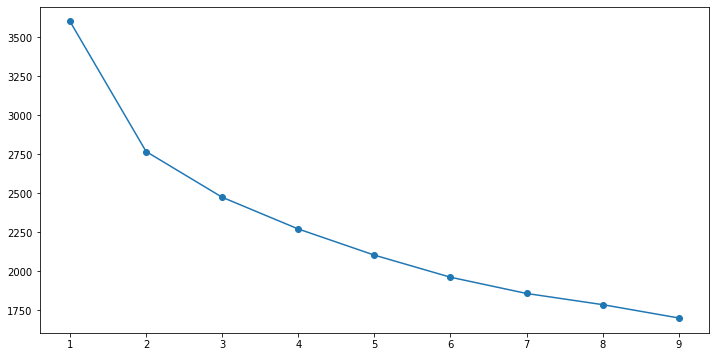

In [77]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Hence 2 clusters

In [78]:
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(X_std)
labels = kmeans.predict(X_std)
centroids = kmeans.cluster_centers_

print("Centroid values")
print(centroids) 
print("labels")
print(labels) 

Centroid values
[[ 0.08768923 -0.22916667  0.14838798  0.11584069 -0.31739688  0.24743583
   0.44312086 -0.74800676  0.41728107  0.24159838 -0.70806189  0.50734332
   0.36577158 -0.85096294  0.55783729 -0.03734095 -0.19475327  0.24019223]
 [-0.11160447  0.29166667 -0.18885743 -0.14743361  0.40395966 -0.31491833
  -0.563972    0.9520086  -0.531085   -0.30748885  0.90116968 -0.64570968
  -0.46552747  1.08304375 -0.70997473  0.04752485  0.2478678  -0.3056992 ]]
labels
[0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0
 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0]


In [0]:
X_train=np.column_stack([X_train,labels])

In [0]:
labels = kmeans.predict(X_test)

In [0]:
X_test=np.column_stack([X_test,labels])

In [82]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_test_pca = pca.transform(X_test)
X_test_pca.shape

(50, 10)

In [87]:
for k in  ['linear','poly','rbf','sigmoid']:
  print("\n-------------------\n\nSVC Mode : ",k)
  svc_model = SVC(C= .1, kernel=k, gamma= 1)
  svc_model.fit(X_train, Y_train)

  prediction = svc_model.predict(X_test)

  print(svc_model.score(X_train, Y_train))
  print(svc_model.score(X_test, Y_test))

  print(confusion_matrix(prediction,Y_test))




-------------------

SVC Mode :  linear
0.995
0.98
[[19  0]
 [ 1 30]]

-------------------

SVC Mode :  poly
1.0
0.98
[[19  0]
 [ 1 30]]

-------------------

SVC Mode :  rbf
0.72
0.74
[[ 7  0]
 [13 30]]

-------------------

SVC Mode :  sigmoid
0.875
0.88
[[20  6]
 [ 0 24]]


Seems like Poly SVC is the best in this case with 98% accuracy in test and 100% accuracy in train data sets.